Fine-tune plots for paper.

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [6]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

# Gridsearch of SVC
Take off the color bar. Modified from ML_element)05.ipynb.

In [3]:
svc_df = pd.read_csv('results/roll_svc_grid_20201120.csv', index_col = 0)
len(svc_df)

126

In [4]:
np.max(svc_df.mean_test_score.astype(float))

0.6296643439351259

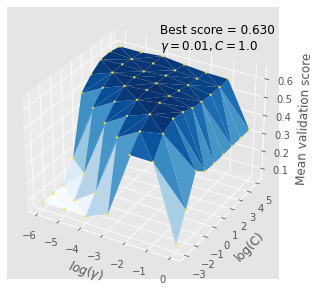

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, 0, .9,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_svc_grid_20201121.png')

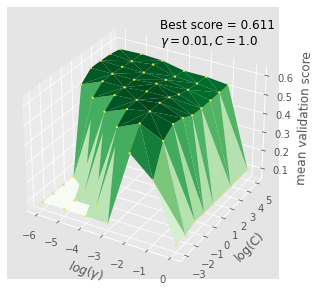

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, 0, .9,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_pca+svc_grid_20201121.png')

# Performances of optimal machines
These are the evaluation of the optimal model in each feature engineering method on the dev set. The optimal models are decided in ML_element_10 (raw), ML_element_12 (image-like) and ML_element_13 (rolling). Thir error rates and and boundary amounts are coollected also from those notebooks.

In [95]:
repre = ['Raw', 'Image-like', 'Rolling']
errors = [46.3, 43.2, 42.7]
bds = [6635, 1445, 1337]

20210701


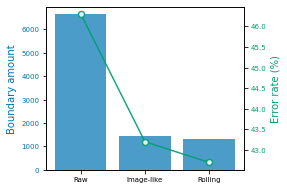

In [98]:
fig, ax1 = plt.subplots(figsize=(3.54, 3))
ax1.bar(repre, bds, color='C0', alpha=.7)
ax1.set_ylabel('Boundary amount', c='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx() 
ax2.plot(repre, errors, marker='o', c='C1', mec='C1', mew=1.5, mfc='w', alpha=.9)
ax2.set_ylabel('Error rate (%)', c='C1')
ax2.tick_params(axis='y', labelcolor='C1')

fig.savefig('results/errors_bds_{}.png'.format(date))
print(date)

# Recall of the most optimal model
It's the recall result of the most optimal model on the dev set. Modified from ML_element_13.ipynb.

In [9]:
# read the results produced by script directly
y_df = pd.read_csv('results/roll_dev_y.csv', index_col=0)
y_df.shape

(21608, 6)

In [10]:
y_df.head()

,y,y_lr,y_svc,y_rf,core_section,y_svc_s
0,0,1,1,1,N11-2,1
1,0,1,1,1,N11-2,1
2,0,1,1,1,N11-2,1
3,0,1,1,1,N11-2,1
4,0,1,1,1,N11-2,1


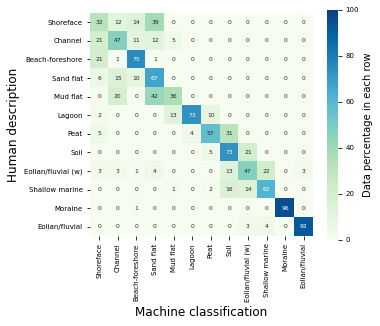

In [108]:
def plot_recall(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import balanced_accuracy_score as score

    for col in y_preds:
        # make confusion matrix between prediction and actual labels
        confusion = confusion_matrix(data_df.y, data_df[col])
        model_name = col[2:]
        con_df = pd.DataFrame(confusion, index = Facies, columns = Facies)
        #con_df.to_csv('results/roll_confusion_{}_{}.csv'.format(model_name, date))

        # normalize the counts ineach row and present in percent
        x = np.copy(confusion).astype(float)
        x /= x.sum(axis = 1, keepdims = True)
        con_per = pd.DataFrame((x*100).astype(int), index = Facies, columns = Facies)
        #con_per.to_csv('results/roll_recall_%_{}_{}.csv'.format(model_name, date))

        # Plot the matrix
        fig, ax = plt.subplots(1, 1, figsize = (5, 4.7))
        sns.heatmap(con_per, annot = con_per.astype(str), ax = ax, cmap = 'GnBu', square = True, vmin=0, vmax=100,
                    xticklabels = con_per.index, yticklabels = con_per.columns, fmt = 's', 
                    annot_kws={'size': 6}, cbar_kws = {'label' : 'Data percentage in each row', 'shrink':.9}
                   )

        ax.set_xlabel('Machine classification', size = 12)
        ax.set_ylabel('Human description', size = 12)
        fig.savefig('results/roll_{}_recall_%_{}_{}.png'.format(split, model_name, date))
        
plot_recall(y_df,  ['y_svc'], Facies, 'dev')

# Choose window size
Modified from post_process.ipynb.

In [109]:
bd_df = pd.read_csv('results/roll_dev_post_evaluation_20210618.csv', index_col=0)
bd_df

,window_size_mm,boundary,balanced_score
0,10,656,0.637111
1,12,606,0.638167
2,14,558,0.635614
3,16,522,0.640458
4,18,488,0.643600
...,...,...,...
190,390,313,0.652887
191,392,313,0.653535
192,394,309,0.654184
193,396,306,0.654846


20210701


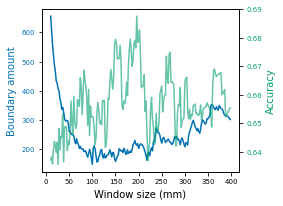

In [116]:
fig, ax1 = plt.subplots(figsize=(3.54, 3))
ax1.set_xlabel('Window size (mm)')
ax1.set_ylabel('Boundary amount', c='C0')
ax1.plot(bd_df.window_size_mm, bd_df.boundary, c='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', c='C1')
ax2.plot(bd_df.window_size_mm, bd_df.balanced_score, c='C1', alpha=.6)
ax2.tick_params(axis='y', labelcolor='C1')

fig.savefig('results/roll_dev_post_evaluation_{}.png'.format(date))
print(date)

# Conjucntion matries
Combine the matrices of the description and the optimal model with post-process. Change color to orange. Fix the color bar. Modified from post_process.ipynb.

In [62]:
y_preds = ['y', 'y_svc_s']
wids = [.9 for _ in range(len(y_preds))]
wids.append(.05)
wids = tuple(wids)
print(wids)

(0.9, 0.9, 0.05)


There are 22 boundaries in description.
There are 157 boundaries in the optimized svc_s model's predictions.
20210701


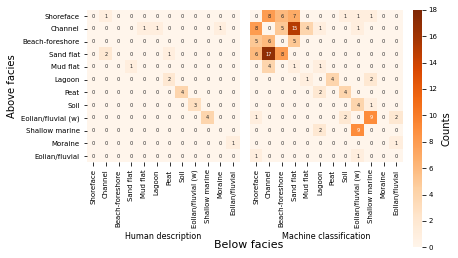

In [99]:
def detect_conjuction(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test).
    """
    
    data_df['id'] = range(len(data_df))
    mat_dict = {}
    #fig, axes = plt.subplots(1, len(y_preds)+1, figsize = (7, 5))
    
    wids = [.9 for _ in range(len(y_preds))]
    wids.append(.05)
    wids = tuple(wids)
    
    grid_kws = {"width_ratios": wids, 'wspace': .1, 'top':.95}
    fig, axes = plt.subplots(1, len(y_preds)+1, gridspec_kw=grid_kws)

    for i, y_pred in enumerate(y_preds):
        y_mean = []
        composite_id = []
        model_name = y_pred[2:] if len(y_pred)>1 else 'description'
        
        for section in np.unique(data_df.core_section):
            y_mean = np.hstack((y_mean, data_df.loc[data_df.core_section == section, y_pred].rolling(window = 2).mean()))
            composite_id = np.hstack((composite_id, data_df[data_df.core_section == section].index))

        # merge the rolling with the original label
        # this will lost the first data poit in each section, but it doesn't mater
        # because the boundary shouldn't be at the begining of each section
        tmp_df = pd.concat([data_df, pd.DataFrame({'y_mean': y_mean}, index = composite_id).dropna()], join = 'inner', axis = 1)

        # if y_pred is not same as y_mean, it means there is a boundary (facies change) between this and above depth
        bd_df = tmp_df[tmp_df[y_pred] != tmp_df.y_mean].copy()
        bd_df['ab_id'] = bd_df.id - 1
        if len(model_name) > 6:
            print('There are {} boundaries in description.'.format(len(bd_df)))
        else:
            print('There are {} boundaries in the optimized {} model\'s predictions.'.format(len(bd_df), model_name))

        # build matrix of boundaries
        bd_mat = np.zeros(shape = (12, 12), dtype = int)

        for row in bd_df.iterrows():
            tmp = np.zeros(shape = (12, 12), dtype = int)
            tmp[data_df[y_pred][int(row[1].ab_id)], data_df[y_pred][int(row[1].id)]] = 1
            bd_mat += tmp
            
        mat_dict[y_pred] = bd_mat
        
        # plot
        if i == 0:            
            sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = axes[i], cmap = 'Oranges', square = True, vmin=0, vmax=18,
                        xticklabels = Facies, yticklabels = Facies, fmt = 's', 
                        annot_kws={'size': 5}, cbar_ax = axes[len(y_preds)]
                       )
            axes[i].set_xlabel('Human description', size=8)
            axes[i].set_ylabel('Above facies')
            axes[i].set_anchor('N')
        else:
            sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = axes[i], cmap = 'Oranges', square = True, vmin=0, vmax=18,
                        xticklabels = Facies, yticklabels = False, fmt = 's', 
                        annot_kws={'size': 5}, cbar_kws = {'label' : 'Counts'}, cbar_ax = axes[len(y_preds)]
                       )
            axes[i].set_xlabel('Machine classification', size=8)
            axes[i].set_anchor('N')
    fig.suptitle('Below facies', x=.5, y=.15, size=11)
    fig.savefig('results/roll_conjunction_matrices_{}_{}.png'.format(split, date))

    return mat_dict

mat_dict = detect_conjuction(y_df,  ['y', 'y_svc_s'], Facies, 'dev')
print(date)

# Confidence score
Adopted from ML_element_07.ipynb.

In [119]:
from joblib import load
svc = load('models/roll_svc_trainn_model_20210511.joblib')

data_df = pd.read_csv('data/XRF_ML_cr.csv')

In [120]:
#y_moraine = data_df.loc[data_df.core_section == 'N70-1', 'facies_merge_2'].values
dec_moraine = svc.decision_function(data_df.loc[data_df.core_section == 'N70-1', data_df.columns[1:-2]].values)
dec_sh = svc.decision_function(data_df.loc[data_df.core_section == 'N11-2', data_df.columns[1:-2]])
dec_moraine.shape

(432, 12)

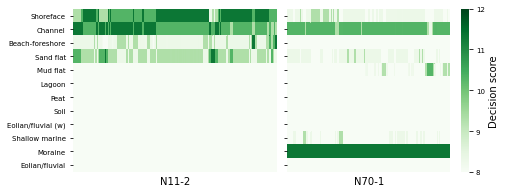

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(dec_sh.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score', 'ticks': [8, 9, 10, 11, 12]})
axes[0].set_xlabel('N11-2')
axes[1].set_xlabel('N70-1')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

# Compile all grid search results using only the training set
The csv files are collected from ML_element_10 (raw), ML_element_12 (image-like) and ML_element_13 (rolling).

In [3]:
dirs = ['results/raw_lr_grid_20210519.csv',
        'results/raw_svc_grid_20210519.csv',
        'results/raw_rf_grid_20210519.csv',
        'results/2d_lr_grid_20210520.csv',
        'results/2d_svc_grid_20210521.csv',
        'results/2d_rf_grid_20210522.csv',
        'results/roll_lr_grid_20210525.csv',
        'results/roll_svc_grid_20210524.csv',
        'results/roll_rf_grid_20210525.csv']

In [6]:
repres = []
grid_df = pd.DataFrame()
for csv in dirs:
    X = pd.read_csv(csv, index_col=0)
    repre = csv.split('/')[1].split('_')[0]
    repres = np.hstack((repres, [repre for _ in range(len(X))]))
    grid_df = pd.concat([grid_df, X], axis=0, join='outer')

grid_df['data_repre'] = repres
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_svc__C,param_svc__gamma,param_rf__max_depth,param_rf__n_estimators,param_scaling,data_repre
0,3.209186,1.283944,0.055870,0.027581,0.0001,PCA(whiten=True),"{'lr__C': 0.0001, 'pca': PCA(whiten=True)}",0.528662,0.497743,0.435998,...,0.513879,0.491201,0.032061,19,NaN,NaN,NaN,NaN,NaN,raw
1,8.664231,0.451673,0.084029,0.018348,0.0010,PCA(whiten=True),"{'lr__C': 0.001, 'pca': PCA(whiten=True)}",0.534292,0.513591,0.440175,...,0.522718,0.501543,0.033025,2,NaN,NaN,NaN,NaN,NaN,raw
2,9.617703,4.125155,0.047049,0.020779,0.0100,PCA(whiten=True),"{'lr__C': 0.01, 'pca': PCA(whiten=True)}",0.536809,0.516041,0.435464,...,0.528485,0.502017,0.036368,1,NaN,NaN,NaN,NaN,NaN,raw
3,13.624158,4.413143,0.042985,0.025356,0.1000,PCA(whiten=True),"{'lr__C': 0.1, 'pca': PCA(whiten=True)}",0.538780,0.511905,0.431256,...,0.529298,0.499762,0.038429,4,NaN,NaN,NaN,NaN,NaN,raw
4,10.774053,3.181409,0.037801,0.016002,1.0000,PCA(whiten=True),"{'lr__C': 1.0, 'pca': PCA(whiten=True)}",0.539098,0.510606,0.431362,...,0.529259,0.499460,0.038410,5,NaN,NaN,NaN,NaN,NaN,raw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,259.514421,7.400075,4.840836,0.364192,NaN,NaN,"{'pca': None, 'rf__max_depth': 10, 'rf__n_esti...",0.537636,0.563051,0.511009,...,0.607246,0.548234,0.034282,2,NaN,NaN,10.0,1000.0,NaN,roll
14,1001.907784,37.950513,9.818432,0.751225,NaN,NaN,"{'pca': None, 'rf__max_depth': 10, 'rf__n_esti...",0.537240,0.564359,0.514415,...,0.605396,0.548610,0.033162,1,NaN,NaN,10.0,5000.0,NaN,roll
15,47.044821,6.770352,2.263721,0.147827,NaN,NaN,"{'pca': None, 'rf__max_depth': 15, 'rf__n_esti...",0.528631,0.550289,0.490283,...,0.570108,0.533989,0.026535,9,NaN,NaN,15.0,100.0,NaN,roll
16,441.955304,65.175162,4.506437,0.355107,NaN,NaN,"{'pca': None, 'rf__max_depth': 15, 'rf__n_esti...",0.528500,0.555893,0.495654,...,0.577285,0.537609,0.027565,8,NaN,NaN,15.0,1000.0,NaN,roll


## Reset index and score ranking

In [7]:
grid_df.reset_index(drop=True, inplace=True)
grid_df.sort_values('mean_test_score', ascending=False, inplace=True)
grid_df['rank_test_score'] = [_+1 for _ in range(len(grid_df))]
grid_df.sort_index(inplace=True)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_svc__C,param_svc__gamma,param_rf__max_depth,param_rf__n_estimators,param_scaling,data_repre
0,3.209186,1.283944,0.055870,0.027581,0.0001,PCA(whiten=True),"{'lr__C': 0.0001, 'pca': PCA(whiten=True)}",0.528662,0.497743,0.435998,...,0.513879,0.491201,0.032061,254,NaN,NaN,NaN,NaN,NaN,raw
1,8.664231,0.451673,0.084029,0.018348,0.0010,PCA(whiten=True),"{'lr__C': 0.001, 'pca': PCA(whiten=True)}",0.534292,0.513591,0.440175,...,0.522718,0.501543,0.033025,222,NaN,NaN,NaN,NaN,NaN,raw
2,9.617703,4.125155,0.047049,0.020779,0.0100,PCA(whiten=True),"{'lr__C': 0.01, 'pca': PCA(whiten=True)}",0.536809,0.516041,0.435464,...,0.528485,0.502017,0.036368,221,NaN,NaN,NaN,NaN,NaN,raw
3,13.624158,4.413143,0.042985,0.025356,0.1000,PCA(whiten=True),"{'lr__C': 0.1, 'pca': PCA(whiten=True)}",0.538780,0.511905,0.431256,...,0.529298,0.499762,0.038429,229,NaN,NaN,NaN,NaN,NaN,raw
4,10.774053,3.181409,0.037801,0.016002,1.0000,PCA(whiten=True),"{'lr__C': 1.0, 'pca': PCA(whiten=True)}",0.539098,0.510606,0.431362,...,0.529259,0.499460,0.038410,230,NaN,NaN,NaN,NaN,NaN,raw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,259.514421,7.400075,4.840836,0.364192,NaN,NaN,"{'pca': None, 'rf__max_depth': 10, 'rf__n_esti...",0.537636,0.563051,0.511009,...,0.607246,0.548234,0.034282,76,NaN,NaN,10.0,1000.0,NaN,roll
390,1001.907784,37.950513,9.818432,0.751225,NaN,NaN,"{'pca': None, 'rf__max_depth': 10, 'rf__n_esti...",0.537240,0.564359,0.514415,...,0.605396,0.548610,0.033162,75,NaN,NaN,10.0,5000.0,NaN,roll
391,47.044821,6.770352,2.263721,0.147827,NaN,NaN,"{'pca': None, 'rf__max_depth': 15, 'rf__n_esti...",0.528631,0.550289,0.490283,...,0.570108,0.533989,0.026535,125,NaN,NaN,15.0,100.0,NaN,roll
392,441.955304,65.175162,4.506437,0.355107,NaN,NaN,"{'pca': None, 'rf__max_depth': 15, 'rf__n_esti...",0.528500,0.555893,0.495654,...,0.577285,0.537609,0.027565,119,NaN,NaN,15.0,1000.0,NaN,roll


In [10]:
# test if the rank is right
grid_df.loc[np.argmax(grid_df.mean_test_score), 'rank_test_score']

1

In [11]:
grid_df[grid_df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_svc__C,param_svc__gamma,param_rf__max_depth,param_rf__n_estimators,param_scaling,data_repre
300,809.996105,39.16461,130.927133,15.995538,NaN,PCA(whiten=True),"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.57833,0.604265,0.51348,...,0.610067,0.573195,0.034916,1,100.0,0.00001,NaN,NaN,StandardScaler(),roll


Just a double check. The parameters and data representation match those used for the final model.

In [14]:
grid_df.to_csv('results/grid_all_{}.csv'.format(date))
print(date)

20210702


# Grid search results of RF and SVC
The csv files and codes are collected from ML_element_10 (raw), ML_element_12 (image-like) and ML_element_13 (rolling). I take away the colorbar, remove the style of ggplot, change the font size of the annotation to 7 and reduce the figure size. Consit the score name to CV score.

## Raw data

In [96]:
lr_df = pd.read_csv('results/raw_lr_grid_20210519.csv', index_col=0)

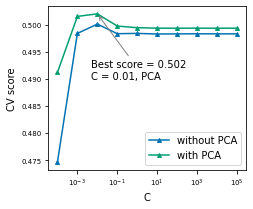

In [97]:
fig = plt.figure(figsize = (3.54, 3))

data_df = lr_df.copy()
x_col = 'param_lr__C'
max_index = np.argmax(data_df.mean_test_score)
plt.xscale('log')
#plt.ylim(0.545, 0.595)
#plt.yticks(np.linspace(0.4, 0.59, 4))

for label, mask in zip(['without PCA', 'with PCA'], [data_df.param_pca != 'PCA(whiten=True)', data_df.param_pca == 'PCA(whiten=True)']):
    xx = data_df.loc[mask, x_col].values.astype(float)
    yy = data_df.loc[mask, 'mean_test_score'].values.astype(float)
    plt.plot(xx, yy, marker = '^', ms = 4, label = label)

plt.ylabel('CV score')
plt.xlabel('C')
plt.legend()

plt.annotate(text = 'Best score = {:.3f}\nC = {}, {}'.format(data_df.mean_test_score[max_index], data_df.loc[max_index, x_col], data_df.param_pca[max_index][:3]),
             xy = (data_df.loc[max_index, x_col], data_df.mean_test_score[max_index]),
             xytext = (.005, 0.49), arrowprops=dict(facecolor='gray', edgecolor='gray', arrowstyle = '->')
            )
#fig.subplots_adjust(wspace = 0.05)
fig.savefig('results/raw_lr_grid_combined_{}.png'.format(date))

In [98]:
svc_df = pd.read_csv('results/raw_svc_grid_20210519.csv', index_col = 0)

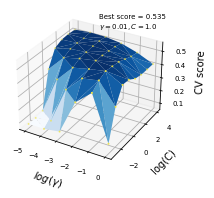

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .87, text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/raw_svc_grid_{}.png'.format(date))

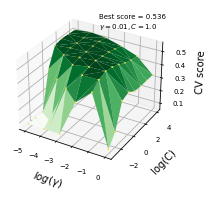

In [100]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .87,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/raw_pca+svc_grid_{}.png'.format(date))

In [101]:
rf_df = pd.read_csv('results/raw_rf_grid_20210519.csv', index_col = 0)

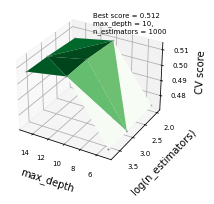

In [102]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9) # with PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .515,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_zticks(np.linspace(0.47, 0.51, 5))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)
fig.savefig('results/raw_pca+rf_grid_{}.png'.format(date))

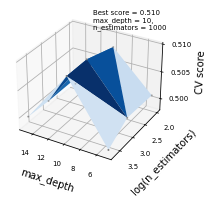

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9,18) # without PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .511,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_zticks(np.linspace(0.50, 0.51, 3))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)

fig.savefig('results/raw_rf_grid_{}.png'.format(date))

## Image-like data

In [104]:
lr_df = pd.read_csv('results/2d_lr_grid_20210520.csv', index_col=0)

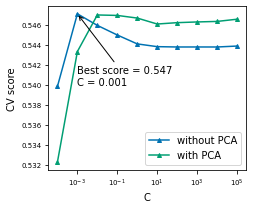

In [105]:
fig = plt.figure(figsize = (3.54, 3))

data_df = lr_df.copy()
x_col = 'param_lr__C'
max_index = np.argmax(data_df.mean_test_score)
plt.xscale('log')
#plt.ylim(0.545, 0.595)
#plt.yticks(np.linspace(0.4, 0.59, 4))

for label, mask in zip(['without PCA', 'with PCA'], [data_df.param_pca != 'PCA(n_components=50, whiten=True)', data_df.param_pca == 'PCA(n_components=50, whiten=True)']):
    xx = data_df.loc[mask, x_col].values.astype(float)
    yy = data_df.loc[mask, 'mean_test_score'].values.astype(float)
    plt.plot(xx, yy, marker = '^', ms = 4, label = label)

plt.ylabel('CV score')
plt.xlabel('C')
plt.legend()

plt.annotate(text = 'Best score = {:.3f}\nC = {}'.format(data_df.mean_test_score[max_index], data_df.loc[max_index, x_col]),
             xy = (data_df.loc[max_index, x_col], data_df.mean_test_score[max_index]),
             xytext = (.001, 0.54), arrowprops=dict(facecolor='gray', arrowstyle = '->')
            )
#fig.subplots_adjust(wspace = 0.05)
fig.savefig('results/2d_lr_grid_combined_{}.png'.format(date))

In [106]:
svc_df = pd.read_csv('results/2d_svc_grid_20210521.csv', index_col = 0)

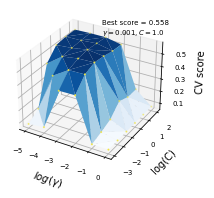

In [107]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .85, text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/2d_svc_grid_{}.png'.format(date))

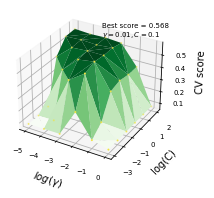

In [108]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .85,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/2d_svc+pca_grid_{}.png'.format(date))

In [109]:
rf_df = pd.read_csv('results/2d_rf_grid_20210522.csv', index_col = 0)

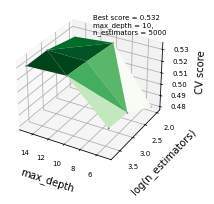

In [110]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9) # with PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .535,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.47, 0.51, 5))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)
fig.savefig('results/2d_pca+rf_grid_{}.png'.format(date))

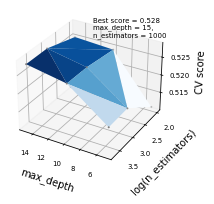

In [111]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9,18) # without PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .528,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_zticks(np.linspace(0.515, 0.525, 3))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)

fig.savefig('results/2d_rf_grid_{}.png'.format(date))

## Rolling data

In [112]:
lr_df = pd.read_csv('results/roll_lr_grid_20210525.csv', index_col=0)

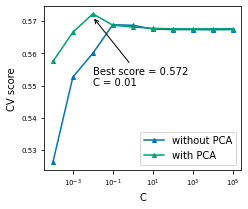

In [113]:
fig = plt.figure(figsize = (3.54, 3))

data_df = lr_df.copy()
x_col = 'param_lr__C'
max_index = np.argmax(data_df.mean_test_score)
plt.xscale('log')
#plt.ylim(0.545, 0.595)
#plt.yticks(np.linspace(0.56, 0.59, 4))

for label, mask in zip(['without PCA', 'with PCA'], [data_df.param_pca != 'PCA(whiten=True)', data_df.param_pca == 'PCA(whiten=True)']):
    xx = data_df.loc[mask, x_col].values.astype(float)
    yy = data_df.loc[mask, 'mean_test_score'].values.astype(float)
    plt.plot(xx, yy, marker = '^', ms = 4, label = label)

plt.ylabel('CV score')
plt.xlabel('C')
plt.legend()

plt.annotate(text = 'Best score = {:.3f}\nC = {}'.format(data_df.mean_test_score[max_index], data_df.loc[max_index, x_col]),
             xy = (data_df.loc[max_index, x_col], data_df.mean_test_score[max_index]-.001),
             xytext = (.01, 0.55), arrowprops=dict(facecolor='gray', arrowstyle = '->')
            )
fig.savefig('results/roll_lr_grid_combined_{}.png'.format(date))

In [114]:
svc_df = pd.read_csv('results/roll_svc_grid_20210524.csv', index_col = 0)

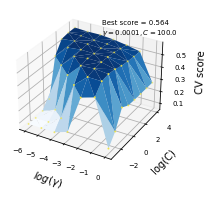

In [115]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .88, text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_svc_grid_{}.png'.format(date))

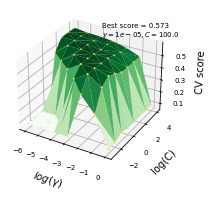

In [116]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-1, -2, .88,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_svc+pca_grid_{}.png'.format(date))

In [117]:
rf_df = pd.read_csv('results/roll_rf_grid_20210525.csv', index_col = 0)

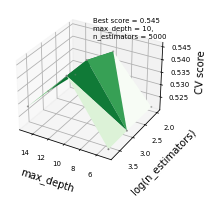

In [118]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9) # with PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .545,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.47, 0.51, 5))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)
fig.savefig('results/roll_pca+rf_grid_{}.png'.format(date))

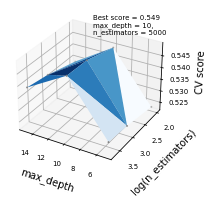

In [119]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9,18) # without PCA
fig = plt.figure(figsize = (3.54, 3))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .55,text, fontsize = 7)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.515, 0.525, 3))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('CV score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)

fig.savefig('results/roll_rf_grid_{}.png'.format(date))